# **Import Library**

In [ ]:
!pip install imbalanced-learn
!pip install tensorflow
!pip install scikit-learn
!pip show tensorflow


Name: tensorflow
Version: 2.17.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, libclang, ml-dtypes, numpy, opt-einsum, packaging, protobuf, requests, setuptools, six, tensorboard, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: dopamine_rl, tf_keras


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
import xgboost as Xgb
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from sklearn.metrics import f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.base import BaseEstimator, ClassifierMixin






# **Import Dataset**

In [ ]:
Alopecia_Dataset_1=pd.read_csv('/content/Predict Hair Fall (2).csv')

In [ ]:
Alopecia_Dataset_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Id                         999 non-null    int64 
 1   Genetics                   999 non-null    object
 2   Hormonal Changes           999 non-null    object
 3   Medical Conditions         999 non-null    object
 4   Medications & Treatments   999 non-null    object
 5   Nutritional Deficiencies   999 non-null    object
 6   Stress                     999 non-null    object
 7   Age                        999 non-null    int64 
 8   Poor Hair Care Habits      999 non-null    object
 9   Environmental Factors      999 non-null    object
 10  Smoking                    999 non-null    object
 11  Weight Loss                999 non-null    object
 12  Hair Loss                  999 non-null    int64 
dtypes: int64(3), object(10)
memory usage: 101.6+ KB


# Dataset **Information**

In [ ]:
Alopecia_Dataset_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Id                         999 non-null    int64 
 1   Genetics                   999 non-null    object
 2   Hormonal Changes           999 non-null    object
 3   Medical Conditions         999 non-null    object
 4   Medications & Treatments   999 non-null    object
 5   Nutritional Deficiencies   999 non-null    object
 6   Stress                     999 non-null    object
 7   Age                        999 non-null    int64 
 8   Poor Hair Care Habits      999 non-null    object
 9   Environmental Factors      999 non-null    object
 10  Smoking                    999 non-null    object
 11  Weight Loss                999 non-null    object
 12  Hair Loss                  999 non-null    int64 
dtypes: int64(3), object(10)
memory usage: 101.6+ KB


In [ ]:
Alopecia_Dataset_1.shape

(999, 13)

In [ ]:
Alopecia_Dataset_1.isnull().sum()

,0
Id,0
Genetics,0
Hormonal Changes,0
Medical Conditions,0
Medications & Treatments,0
Nutritional Deficiencies,0
Stress,0
Age,0
Poor Hair Care Habits,0
Environmental Factors,0


# **Data Type**

In [ ]:
data_types = Alopecia_Dataset_1.dtypes
num_categorical = sum(data_types == 'object')
num_quantitative = sum(data_types != 'object')

print("Number of categorical features:", num_categorical)
print("Number of quantitative features:", num_quantitative)

Number of categorical features: 10
Number of quantitative features: 3


# **Imbalanced Dataset**

<Axes: xlabel='Hair Loss', ylabel='count'>

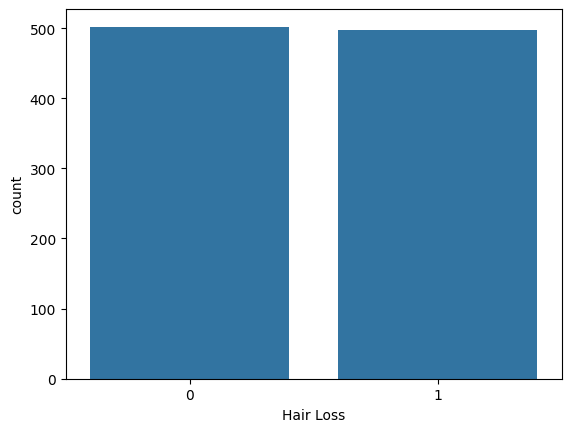

In [ ]:
sns.countplot(x="Hair Loss", data=Alopecia_Dataset_1)

# **Correlation Matrix**

                           Genetics  Hormonal Changes  Medical Conditions  \
Genetics                   1.000000          0.105127            0.026594   
Hormonal Changes           0.105127          1.000000           -0.116713   
Medical Conditions         0.026594         -0.116713            1.000000   
Medications & Treatments  -0.200556         -0.061129            0.026758   
Nutritional Deficiencies  -0.139371         -0.041101            0.056528   
Stress                    -0.040424         -0.070488           -0.074916   
Age                        0.053519         -0.036537           -0.041112   
Poor Hair Care Habits      0.000021          0.004061           -0.143549   
Environmental Factors     -0.147673          0.103118           -0.056415   
Smoking                    0.030099          0.056716           -0.185521   
Weight Loss               -0.001955         -0.086779            0.014478   
Hair Loss                  0.158130          0.021216            0.016292   

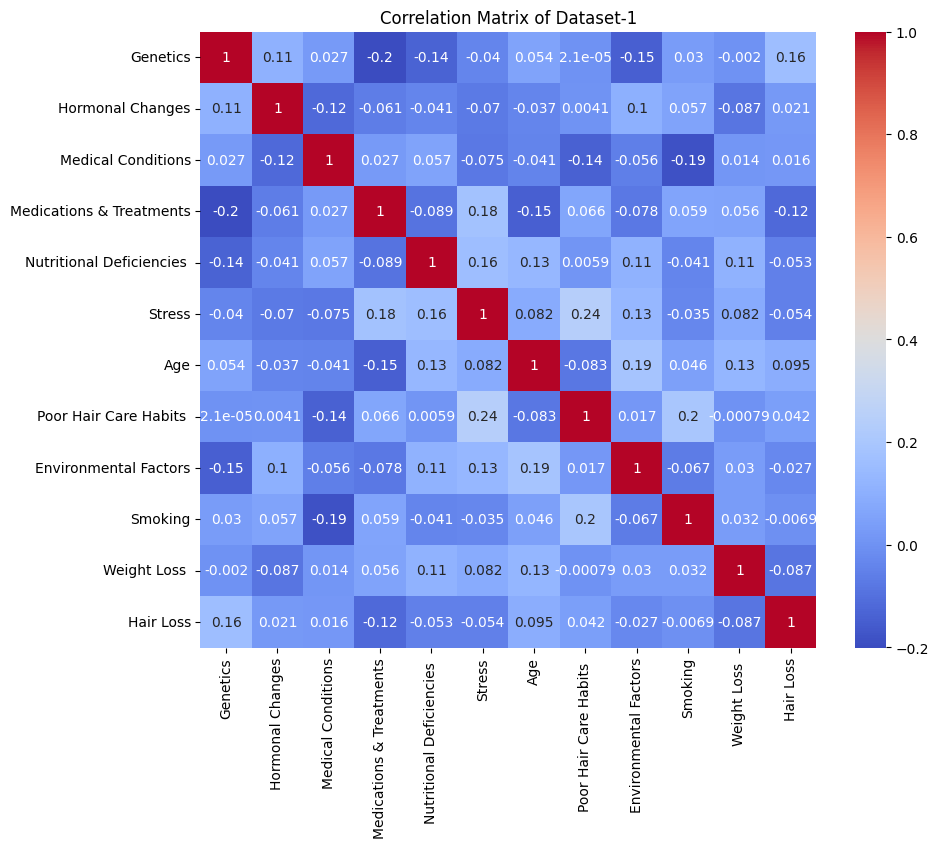

In [ ]:
np.random.seed(0)
data = np.random.rand(100, 12)
df = pd.DataFrame(data, columns=['Genetics', 'Hormonal Changes', 'Medical Conditions', 'Medications & Treatments', 'Nutritional Deficiencies ','Stress','Age','Poor Hair Care Habits ','Environmental Factors','Smoking','Weight Loss ','Hair Loss'])

# Calculate the correlation matrix
corr_matrix = df.corr()

# Print the correlation matrix
print(corr_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix of Dataset-1')
plt.show()

# **Drop Columns**

Medications & Treatments: Correlation of -0.12 with Hair Loss.
Weight Loss: Correlation of -0.087 with Hair Loss.
Nutritional Deficiencies: Correlation of -0.053 with Hair Loss.
Stress: Correlation of -0.054 with Hair Loss.
Environmental Factors: Correlation of -0.027 with Hair Loss.

In [ ]:
Alopecia_Dataset_1.drop(columns='Weight Loss ', axis=1, inplace=True)

In [ ]:
Alopecia_Dataset_1.tail()

,Id,Genetics,Hormonal Changes,Medical Conditions,Medications & Treatments,Nutritional Deficiencies,Stress,Age,Poor Hair Care Habits,Environmental Factors,Smoking,Hair Loss
994,184367,Yes,No,Seborrheic Dermatitis,Rogaine,Vitamin A Deficiency,Low,33,Yes,Yes,Yes,1
995,164777,Yes,Yes,No Data,Accutane,Protein deficiency,Low,47,No,No,No,0
996,143273,No,Yes,Androgenetic Alopecia,Antidepressants,Protein deficiency,Moderate,20,Yes,No,Yes,1
997,169123,No,Yes,Dermatitis,Immunomodulators,Biotin Deficiency,Moderate,32,Yes,Yes,Yes,1
998,127183,Yes,Yes,Psoriasis,Blood Pressure Medication,Vitamin D Deficiency,Low,34,No,Yes,No,1


In [ ]:
Alopecia_Dataset_1['Medical Conditions'].value_counts()

,count
Medical Conditions,
No Data,110
Alopecia Areata,107
Psoriasis,100
Thyroid Problems,99
Androgenetic Alopecia,98
Dermatitis,92
Dermatosis,88
Seborrheic Dermatitis,88
Scalp Infection,79


# **Encoding**

In [ ]:
Alopecia_Dataset_1.replace({"Genetics":{"No":0,"Yes":1},"Hormonal Changes":{"No":0,"Yes":1},"Poor Hair Care Habits ":{"No":0,"Yes":1},"Smoking":{"No":0,"Yes":1}},inplace=True)

<ipython-input-78-aa28f9da7c03>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Alopecia_Dataset_1.replace({"Genetics":{"No":0,"Yes":1},"Hormonal Changes":{"No":0,"Yes":1},"Poor Hair Care Habits ":{"No":0,"Yes":1},"Smoking":{"No":0,"Yes":1}},inplace=True)


In [ ]:
Alopecia_Dataset_1.head()

,Id,Genetics,Hormonal Changes,Medical Conditions,Medications & Treatments,Nutritional Deficiencies,Stress,Age,Poor Hair Care Habits,Environmental Factors,Smoking,Hair Loss
0,133992,1,0,No Data,No Data,Magnesium deficiency,Moderate,19,1,Yes,0,0
1,148393,0,0,Eczema,Antibiotics,Magnesium deficiency,High,43,1,Yes,0,0
2,155074,0,0,Dermatosis,Antifungal Cream,Protein deficiency,Moderate,26,1,Yes,0,0
3,118261,1,1,Ringworm,Antibiotics,Biotin Deficiency,Moderate,46,1,Yes,0,0
4,111915,0,0,Psoriasis,Accutane,Iron deficiency,Moderate,30,0,Yes,1,1


In [ ]:
Alopecia_Dataset_1.replace({"Medical Conditions":{"No Data":0,"Alopecia Areata ":1,"Psoriasis":2,"Thyroid Problems":3,"Androgenetic Alopecia":4,"Dermatitis":5,"Dermatosis":6,"Seborrheic Dermatitis":7,"Scalp Infection":8,"Eczema":9,"Ringworm":10}},inplace=True)

<ipython-input-80-a95f2bc7c028>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Alopecia_Dataset_1.replace({"Medical Conditions":{"No Data":0,"Alopecia Areata ":1,"Psoriasis":2,"Thyroid Problems":3,"Androgenetic Alopecia":4,"Dermatitis":5,"Dermatosis":6,"Seborrheic Dermatitis":7,"Scalp Infection":8,"Eczema":9,"Ringworm":10}},inplace=True)


In [ ]:
Alopecia_Dataset_1.head()

,Id,Genetics,Hormonal Changes,Medical Conditions,Medications & Treatments,Nutritional Deficiencies,Stress,Age,Poor Hair Care Habits,Environmental Factors,Smoking,Hair Loss
0,133992,1,0,0,No Data,Magnesium deficiency,Moderate,19,1,Yes,0,0
1,148393,0,0,9,Antibiotics,Magnesium deficiency,High,43,1,Yes,0,0
2,155074,0,0,6,Antifungal Cream,Protein deficiency,Moderate,26,1,Yes,0,0
3,118261,1,1,10,Antibiotics,Biotin Deficiency,Moderate,46,1,Yes,0,0
4,111915,0,0,2,Accutane,Iron deficiency,Moderate,30,0,Yes,1,1


In [ ]:
X,Y= make_classification(n_samples=1000, n_features=12, n_informative=6, n_redundant=6,
                           n_clusters_per_class=1, weights=[0.9, 0.1], flip_y=0, random_state=42)


# **Data Splitting**

In [ ]:
X = Alopecia_Dataset_1[["Genetics", "Hormonal Changes", "Medical Conditions", "Age", "Poor Hair Care Habits ", "Smoking"]]
Y = Alopecia_Dataset_1["Hair Loss"]

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# **Augmentation Of the Datase**

In [ ]:
import numpy as np
import pandas as pd


target_size = 8000
current_size = X.shape[0]
augmentation_factor = target_size // current_size

numeric_cols = X.select_dtypes(include=[np.number]).columns
categorical_cols = X.select_dtypes(exclude=[np.number]).columns


numeric_data_list = []
categorical_data_list = []


for i in range(augmentation_factor):
    noise = np.random.normal(0, 0.01, X[numeric_cols].shape)  # Mean = 0, Std Dev = 0.01
    X_numeric_augmented = X[numeric_cols] + noise
    numeric_data_list.append(X_numeric_augmented)

    X_categorical_augmented = X[categorical_cols]
    categorical_data_list.append(X_categorical_augmented)

X_numeric_combined = pd.concat(numeric_data_list, axis=0).reset_index(drop=True)
X_categorical_combined = pd.concat(categorical_data_list, axis=0).reset_index(drop=True)

X_combined = pd.concat([X_numeric_combined, X_categorical_combined], axis=1)
Y_combined = pd.concat([pd.Series(Y)] * augmentation_factor, axis=0).reset_index(drop=True)


n_remaining = target_size - len(X_combined)
if n_remaining > 0:
    X_remaining_numeric = X[numeric_cols].sample(n_remaining, replace=True).reset_index(drop=True)
    X_remaining_categorical = X[categorical_cols].sample(n_remaining, replace=True).reset_index(drop=True)
    X_remaining_combined = pd.concat([X_remaining_numeric, X_remaining_categorical], axis=1)

    X_combined = pd.concat([X_combined, X_remaining_combined], axis=0).reset_index(drop=True)
    Y_remaining = pd.Series(Y).sample(n_remaining, replace=True).reset_index(drop=True)
    Y_combined = pd.concat([Y_combined, Y_remaining], axis=0).reset_index(drop=True)

print(f"Original dataset size: {current_size}")
print(f"Augmented dataset size: {X_combined.shape[0]}")


augmented_dataset = pd.DataFrame(X_combined)
augmented_dataset['Hair Loss'] = Y_combined

print(f"Final augmented dataset shape: {augmented_dataset.shape}")

print(augmented_dataset.head())
print(augmented_dataset.describe())

Original dataset size: 999
Augmented dataset size: 8000
Final augmented dataset shape: (8000, 7)
   Genetics  Hormonal Changes  Medical Conditions        Age  \
0  1.003528         -0.001528           -0.012987  19.012761   
1  0.000451          0.023396            8.997236  42.997404   
2  0.015928         -0.002586            6.003083  25.986219   
3  0.989932          1.016816            9.992077  45.994684   
4  0.004811          0.027594            1.999253  30.002587   

   Poor Hair Care Habits    Smoking  Hair Loss  
0                1.013250  0.002053          0  
1                1.003645  0.014713          0  
2                0.996880 -0.008403          0  
3                1.003658  0.012978          0  
4                0.002756  1.014350          1  
          Genetics  Hormonal Changes  Medical Conditions          Age  \
count  8000.000000       8000.000000         8000.000000  8000.000000   
mean      0.522134          0.509503            4.547643    34.186727   
std  

In [ ]:
X_final = augmented_dataset[["Genetics", "Hormonal Changes", "Medical Conditions", "Age", "Poor Hair Care Habits ", "Smoking"]]
Y_final = augmented_dataset["Hair Loss"]

# Split the dataset
X_train, X_test, Y_train, Y_test = train_test_split(X_final, Y_final, test_size=0.30, random_state=42)

In [ ]:
print(X_final)

      Genetics  Hormonal Changes  Medical Conditions        Age  \
0     1.003528         -0.001528           -0.012987  19.012761   
1     0.000451          0.023396            8.997236  42.997404   
2     0.015928         -0.002586            6.003083  25.986219   
3     0.989932          1.016816            9.992077  45.994684   
4     0.004811          0.027594            1.999253  30.002587   
...        ...               ...                 ...        ...   
7995  0.000000          1.000000            5.000000  38.000000   
7996  1.000000          1.000000            8.000000  19.000000   
7997  0.000000          0.000000            6.000000  26.000000   
7998  1.000000          0.000000            8.000000  37.000000   
7999  0.000000          0.000000            4.000000  45.000000   

      Poor Hair Care Habits    Smoking  
0                   1.013250  0.002053  
1                   1.003645  0.014713  
2                   0.996880 -0.008403  
3                   1.003658  0

In [ ]:
print(Y_final)

0       0
1       0
2       0
3       0
4       1
       ..
7995    0
7996    1
7997    0
7998    0
7999    1
Name: Hair Loss, Length: 8000, dtype: int64


# **Feature Scaling**

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
Alopecia_Dataset_1.describe()

,Id,Genetics,Hormonal Changes,Medical Conditions,Age,Poor Hair Care Habits,Smoking,Hair Loss
count,999.000000,999.000000,999.00000,999.000000,999.000000,999.000000,999.000000,999.000000
mean,153354.673674,0.522523,0.50951,4.547548,34.188188,0.492492,0.519520,0.497497
std,25516.041985,0.499743,0.50016,3.106573,9.377980,0.500194,0.499869,0.500244
min,110003.000000,0.000000,0.00000,0.000000,18.000000,0.000000,0.000000,0.000000
25%,131867.500000,0.000000,0.00000,2.000000,26.000000,0.000000,0.000000,0.000000
50%,152951.000000,1.000000,1.00000,4.000000,34.000000,0.000000,1.000000,0.000000
75%,174969.000000,1.000000,1.00000,7.000000,42.000000,1.000000,1.000000,1.000000
max,199949.000000,1.000000,1.00000,10.000000,50.000000,1.000000,1.000000,1.000000


# **Model Training**

# **Logistic Regression**

In [ ]:
log_reg=LogisticRegression(max_iter=500)
log_reg.fit(X_train_scaled,Y_train)

LogisticRegression(max_iter=500)

In [ ]:
X_train_prediction_log_reg=log_reg.predict(X_train_scaled)
train_accuracy_log_reg=accuracy_score(Y_train,X_train_prediction_log_reg)
print("Training data accuracy of logreg: ",train_accuracy_log_reg)

Training data accuracy of logreg:  0.5446428571428571


In [ ]:
X_test_prediction_log_reg=log_reg.predict(X_test_scaled)
test_accuracy_log_reg=accuracy_score(Y_test,X_test_prediction_log_reg)
print("Testing data accuracy of logreg: ",test_accuracy_log_reg)

Testing data accuracy of logreg:  0.54375


# **Gaussian Naive Bayes**

In [ ]:
nbayes = GaussianNB()
nbayes.fit(X_train_scaled,Y_train)

GaussianNB()

In [ ]:
X_train_prediction_nbayes=nbayes.predict(X_train_scaled)
train_accuracy_nbayes=accuracy_score(Y_train,X_train_prediction_nbayes)
print("Training data accuracy of nbayes: ",train_accuracy_nbayes)

Training data accuracy of nbayes:  0.5455357142857142


In [ ]:
X_test_prediction_nbayes=nbayes.predict(X_test_scaled)
test_accuracy_nbayes=accuracy_score(Y_test,X_test_prediction_nbayes)
print("Testing data accuracy of nbayes: ",test_accuracy_nbayes)

Testing data accuracy of nbayes:  0.5454166666666667


# **KNN**

In [ ]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train_scaled, Y_train)

KNeighborsClassifier(n_neighbors=10)

In [ ]:
X_train_prediction_knn=knn.predict(X_train_scaled)
train_accuracy_knn=accuracy_score(Y_train,X_train_prediction_knn)
print("Training data accuracy of knn: ",train_accuracy_knn)

Training data accuracy of knn:  0.8667857142857143


In [ ]:
X_test_prediction_knn=knn.predict(X_test_scaled)
test_accuracy_knn=accuracy_score(Y_test,X_test_prediction_knn)
print("Testing data accuracy of knn: ",test_accuracy_knn)

Testing data accuracy of knn:  0.7729166666666667


# **Decision Tree Classifier**

In [ ]:
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train_scaled, Y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
X_train_prediction_dt_classifier=dt_classifier.predict(X_train_scaled)
train_accuracy_dt_classifier=accuracy_score(Y_train,X_train_prediction_dt_classifier)
print("Training data accuracy of dt_classifier: ",train_accuracy_dt_classifier)

Training data accuracy of dt_classifier:  1.0


In [ ]:
X_test_prediction_dt_classifier=dt_classifier.predict(X_test_scaled)
test_accuracy_dt_classifier=accuracy_score(Y_test,X_test_prediction_dt_classifier)
print("Testing data accuracy of dt_classifier: ",test_accuracy_dt_classifier)

Testing data accuracy of dt_classifier:  0.7295833333333334


# **Random Forest**

In [ ]:
random_forest = RandomForestClassifier(n_estimators=300)
random_forest.fit(X_train_scaled, Y_train)
X_train_prediction_random_forest=random_forest.predict(X_train_scaled)
train_accuracy_random_forest=accuracy_score(Y_train,X_train_prediction_random_forest)
print("Training data accuracy of random_forest: ",train_accuracy_random_forest)


Training data accuracy of random_forest:  1.0


In [ ]:
X_test_prediction_random_forest=random_forest.predict(X_test_scaled)
test_accuracy_random_forest=accuracy_score(Y_test,X_test_prediction_random_forest)
print("Testing data accuracy of random_forest: ",test_accuracy_random_forest)

Testing data accuracy of random_forest:  0.7645833333333333


# **XGBClassifier**

In [ ]:
xgb = Xgb.XGBClassifier()
xgb.fit(X_train_scaled, Y_train)
X_train_prediction_xgb=xgb.predict(X_train_scaled)
train_accuracy_xgb=accuracy_score(Y_train,X_train_prediction_xgb)
print("Training data accuracy of xgb: ",train_accuracy_xgb)

Training data accuracy of xgb:  0.9828571428571429


In [ ]:
X_test_prediction_xgb=xgb.predict(X_test_scaled)
test_accuracy_xgb=accuracy_score(Y_test,X_test_prediction_xgb)
print("Testing data accuracy of xgb: ",test_accuracy_xgb)

Testing data accuracy of xgb:  0.7241666666666666


# **SVM**

In [ ]:
svc = SVC()
svc.fit(X_train_scaled, Y_train)
X_train_prediction_svc=svc.predict(X_train_scaled)
train_accuracy_svc=accuracy_score(Y_train,X_train_prediction_svc)
print("Training data accuracy of xgb: ",train_accuracy_svc)

Training data accuracy of xgb:  0.6442857142857142


In [ ]:
X_test_prediction_svc=svc.predict(X_test_scaled)
test_accuracy_svc=accuracy_score(Y_test,X_test_prediction_svc)
print("Testing data accuracy of svc: ",test_accuracy_svc)

Testing data accuracy of svc:  0.64


# **Models Score**

In [ ]:
models = pd.DataFrame({
    'Model': ['Logistic Regression','Naive Bayes', "KNN","DT_classifier","Random_Forest","XGBClassifier","SVC","Meta Classifier"],
    'Score': [test_accuracy_log_reg,test_accuracy_nbayes,test_accuracy_knn,test_accuracy_dt_classifier,test_accuracy_random_forest,test_accuracy_xgb,test_accuracy_svc,accuracy_meta]})
models.sort_values(by='Score', ascending=False)

,Model,Score
7,Meta Classifier,0.823750
2,KNN,0.772917
4,Random_Forest,0.764583
3,DT_classifier,0.729583
5,XGBClassifier,0.724167
6,SVC,0.640000
1,Naive Bayes,0.545417
0,Logistic Regression,0.543750


Random Forest, CNN, DNN, ensamble Meta Classifier, learning curve, confusion matrix , precision, smote data augmentation, boosting model, early stopping, cross verification

# **Meta Classifier**

In [ ]:
predictions_xgb = xgb.predict(X_test_scaled)
predictions_svc = X_test_prediction_svc=svc.predict(X_test_scaled)
predictions_log_reg = log_reg.predict(X_test_scaled)
predictions_rf = random_forest.predict(X_test_scaled)
predictions_knn = knn.predict(X_test_scaled)
predictions_nb = nbayes.predict(X_test_scaled)
predictions_dt = dt_classifier.predict(X_test_scaled)

# Combine predictions into a new DataFrame
predictions_df = pd.DataFrame({
    'xgb': predictions_xgb,
    'svc': predictions_svc,
    'log_reg': predictions_log_reg,
    'rf': predictions_rf,
    'knn': predictions_knn,
    'nb': predictions_nb,
    'dt': predictions_dt
})

# Step 2: Prepare the target variable
target = Y_test  # Use the actual target variable for the test set

# Step 3: Train a meta-classifier
meta_classifier =  Xgb.XGBClassifier()  # You can choose any classifier as the meta-classifier
meta_classifier.fit(predictions_df, target)

# Step 4: Make predictions with the meta-classifier
y_pred_meta = meta_classifier.predict(predictions_df)

# Step 5: Evaluate the performance of the meta-classifier
accuracy_meta = accuracy_score(target, y_pred_meta)
print("Accuracy of Meta Classifier:", accuracy_meta)

Accuracy of Meta Classifier: 0.82375


# **Model Comparsion**

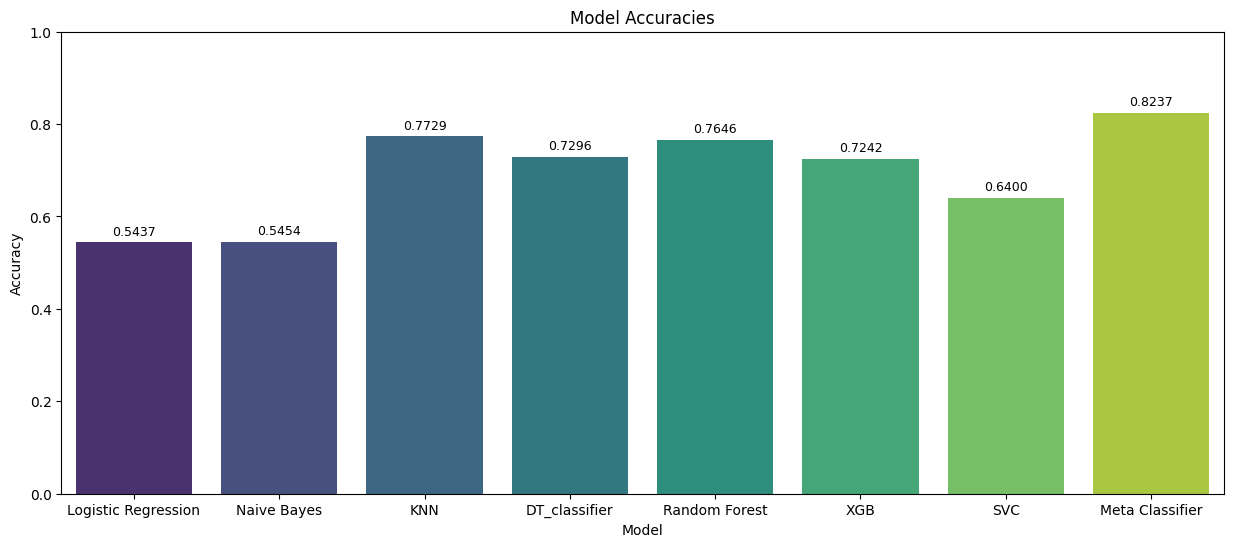

In [ ]:
models = ["Logistic Regression", "Naive Bayes","KNN","DT_classifier","Random Forest","XGB","SVC","Meta Classifier"]
accuracies = [test_accuracy_log_reg, test_accuracy_nbayes,test_accuracy_knn,test_accuracy_dt_classifier,test_accuracy_random_forest,test_accuracy_xgb,test_accuracy_svc,accuracy_meta]

# Create a bar plot using Seaborn
plt.figure(figsize=(15, 6))
sns.barplot(x=models, y=accuracies, hue=models, palette="viridis", legend=False)
plt.title("Model Accuracies")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.ylim(0, 1)  # Set y-axis limit to 0-1 for accuracy

# Display numeric values on the bars
for i, accuracy in enumerate(accuracies):
    plt.text(i, accuracy + 0.01, f"{accuracy:.4f}", ha="center", va="bottom", fontsize=9)

plt.show()

# **Precision,Recall**

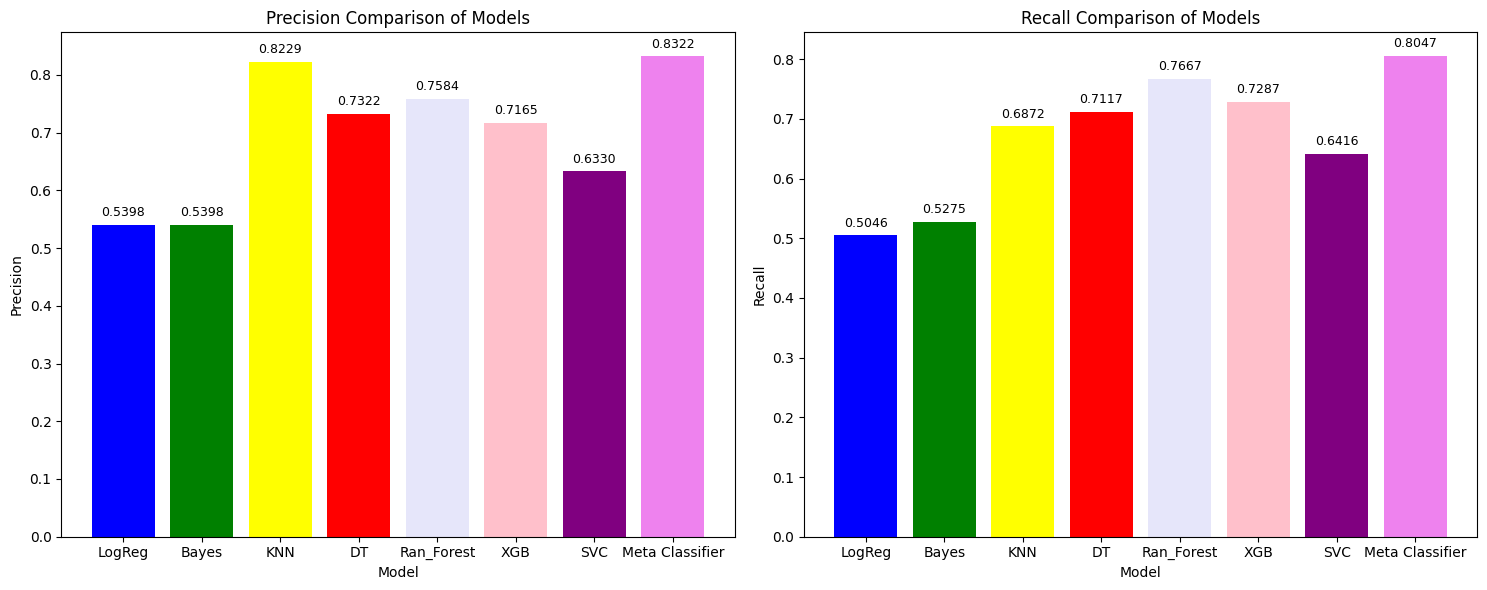

In [ ]:
# Calculate precision and recall for each model
precisions = [precision_score(Y_test,X_test_prediction_log_reg), precision_score(Y_test, X_test_prediction_nbayes),  precision_score(Y_test, X_test_prediction_knn),precision_score(Y_test, X_test_prediction_dt_classifier),precision_score(Y_test,X_test_prediction_random_forest),precision_score(Y_test,X_test_prediction_xgb),precision_score(Y_test,X_test_prediction_svc),precision_score(target, y_pred_meta)]
recalls = [recall_score(Y_test, X_test_prediction_log_reg), recall_score(Y_test, X_test_prediction_nbayes),  recall_score(Y_test, X_test_prediction_knn),recall_score(Y_test, X_test_prediction_dt_classifier),recall_score(Y_test,X_test_prediction_random_forest),recall_score(Y_test,X_test_prediction_xgb),recall_score(Y_test,X_test_prediction_svc),recall_score(target, y_pred_meta)]

# Define models
models = ["LogReg", "Bayes", "KNN","DT","Ran_Forest","XGB","SVC","Meta Classifier"]

# Plot the bar chart for precision
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.bar(models, precisions, color=["blue", "green", "yellow","red","lavender","pink","purple","violet"])
plt.xlabel('Model')
plt.ylabel('Precision')
plt.title('Precision Comparison of Models')
for i, f1 in enumerate(precisions):
    plt.text(i, f1 + 0.01, f"{f1:.4f}", ha="center", va="bottom", fontsize=9)


# Plot the bar chart for recall
plt.subplot(1, 2, 2)
plt.bar(models, recalls, color=["blue", "green", "yellow","red","lavender","pink","purple","violet"])
plt.xlabel('Model')
plt.ylabel('Recall')
plt.title('Recall Comparison of Models')
for i, f1 in enumerate(recalls):
    plt.text(i, f1 + 0.01, f"{f1:.4f}", ha="center", va="bottom", fontsize=9)

plt.tight_layout()
plt.show()




# **F-Score**

In [ ]:
# Calculate F1-score for each model
f1_scores = [f1_score(Y_test, X_test_prediction_log_reg),
             f1_score(Y_test, X_test_prediction_nbayes),
             f1_score(Y_test, X_test_prediction_knn),
             f1_score(Y_test, X_test_prediction_dt_classifier),
             f1_score(Y_test, X_test_prediction_random_forest),
             f1_score(Y_test,X_test_prediction_xgb),
             f1_score(Y_test,X_test_prediction_svc),
             f1_score(target, y_pred_meta),]


# Print F1-scores for each model
for model, f1_score_value in zip(models, f1_scores):
    print(f"{model}: F1-score = {f1_score_value:.4f}")

LogReg: F1-score = 0.5216
Bayes: F1-score = 0.5336
KNN: F1-score = 0.7490
DT: F1-score = 0.7218
Ran_Forest: F1-score = 0.7625
XGB: F1-score = 0.7225
SVC: F1-score = 0.6373
Meta Classifier: F1-score = 0.8182


<ipython-input-115-507a7e2fc1f4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=f1_scores, palette="viridis",legend=False)


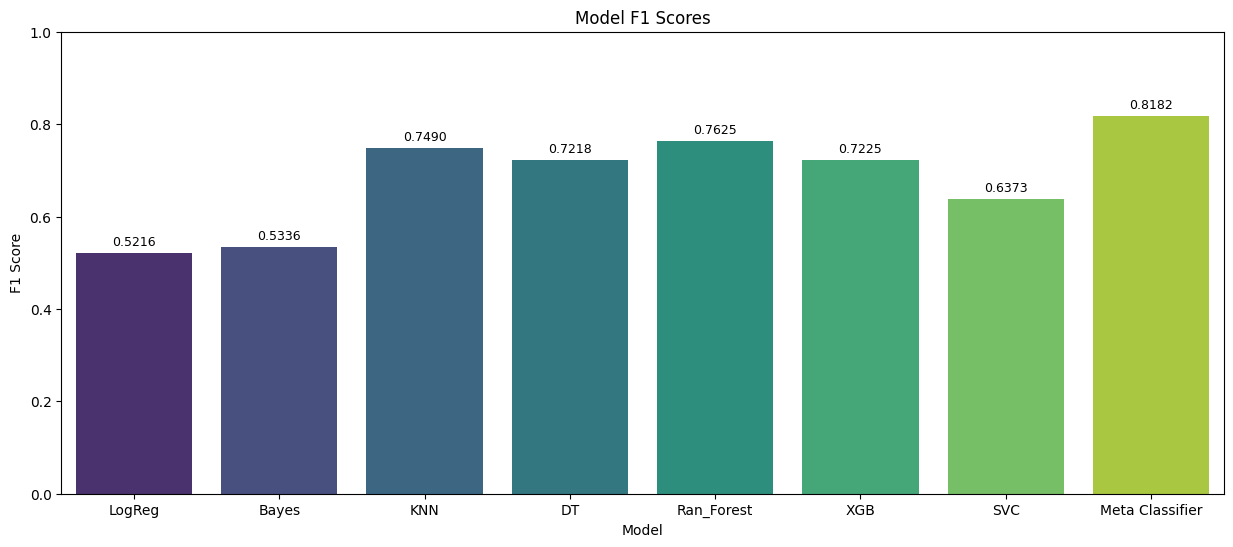

In [ ]:
plt.figure(figsize=(15, 6))
sns.barplot(x=models, y=f1_scores, palette="viridis",legend=False)
plt.title("Model F1 Scores")
plt.xlabel("Model")
plt.ylabel("F1 Score")
plt.ylim(0, 1)  # Set y-axis limit to 0-1 for F1 score

# Display numeric values on the bars for F1 scores
for i, f1 in enumerate(f1_scores):
    plt.text(i, f1 + 0.01, f"{f1:.4f}", ha="center", va="bottom", fontsize=9)

plt.show()

# **Confusin Matrix**

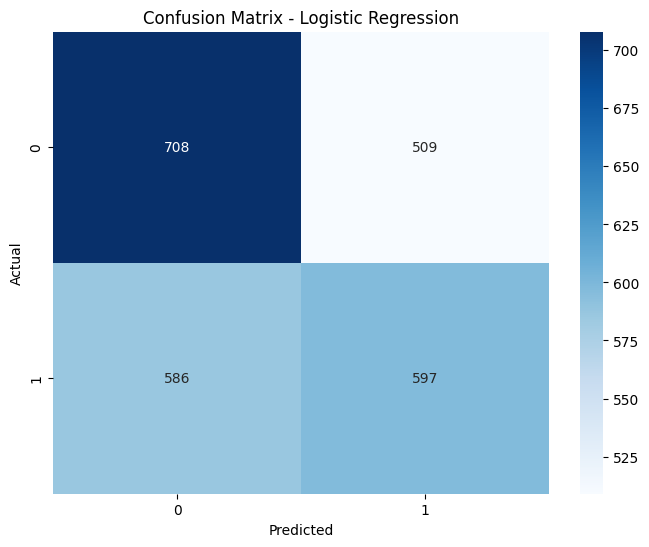

In [ ]:
cm_lr = confusion_matrix(Y_test, X_test_prediction_log_reg)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

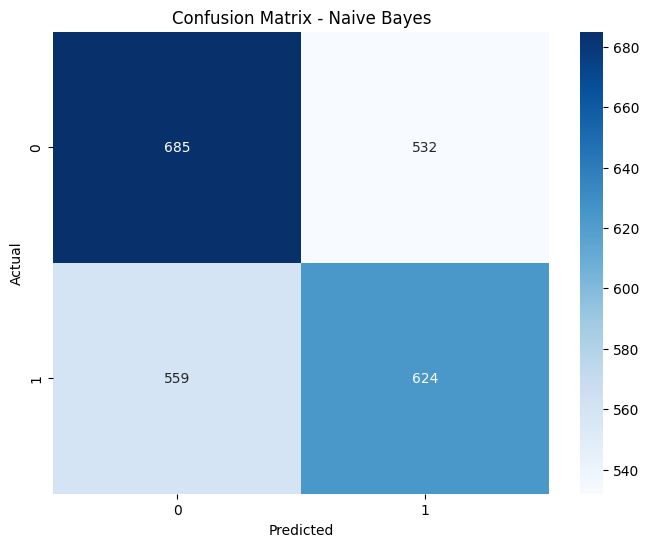

In [ ]:
cm_nb = confusion_matrix(Y_test,X_test_prediction_nbayes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nb, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix - Naive Bayes')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

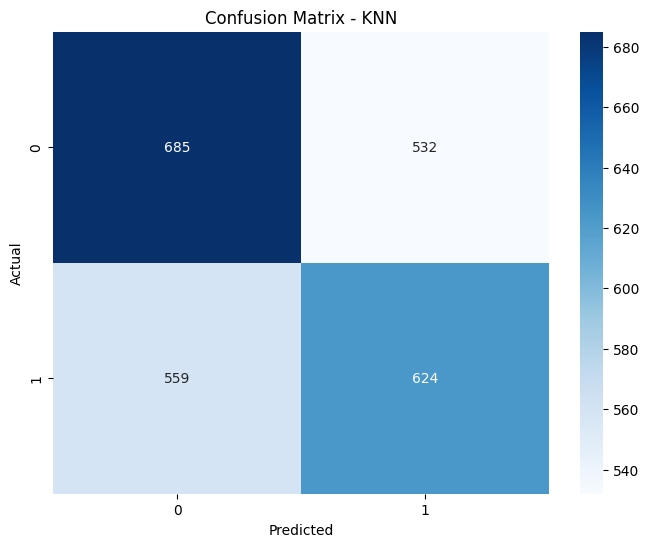

In [ ]:
cm_knn = confusion_matrix(Y_test,X_test_prediction_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nb, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix - KNN')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

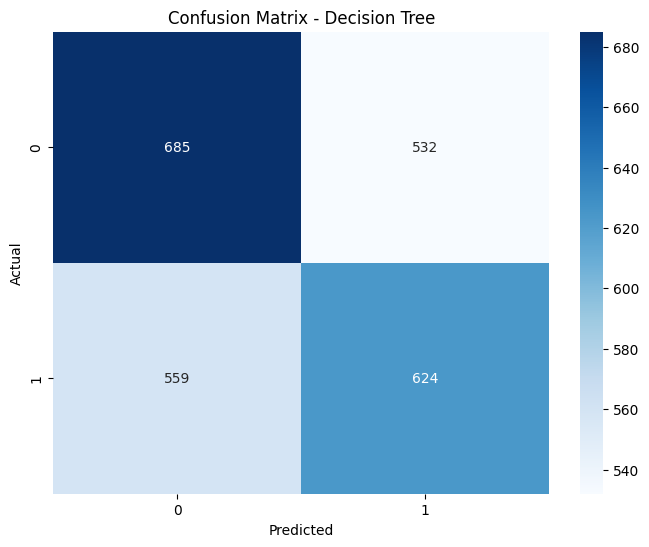

In [ ]:
cm_dt_classifier = confusion_matrix(Y_test,X_test_prediction_dt_classifier)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nb, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

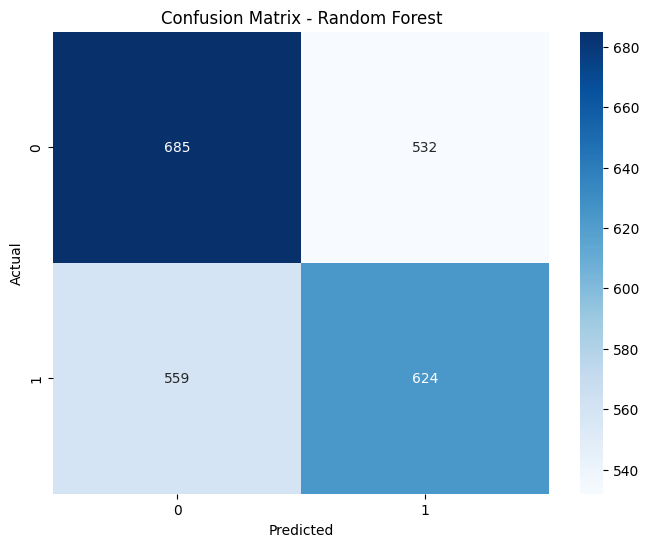

In [ ]:
cm_dt_classifier = confusion_matrix(Y_test,X_test_prediction_random_forest)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nb, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

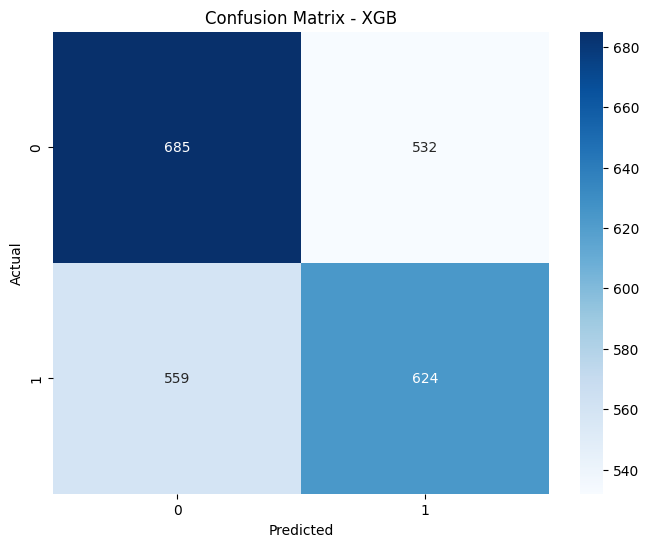

In [ ]:
cm_dt_classifier = confusion_matrix(Y_test,X_test_prediction_xgb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nb, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix - XGB')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

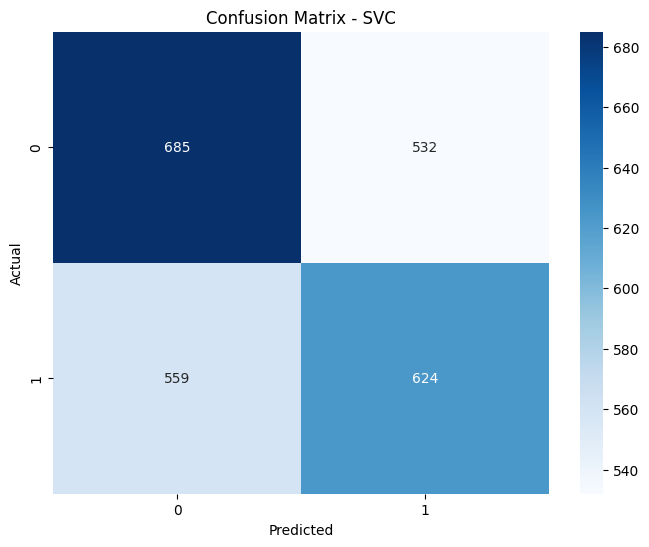

In [ ]:
cm_dt_classifier = confusion_matrix(Y_test,X_test_prediction_svc)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nb, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix - SVC')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

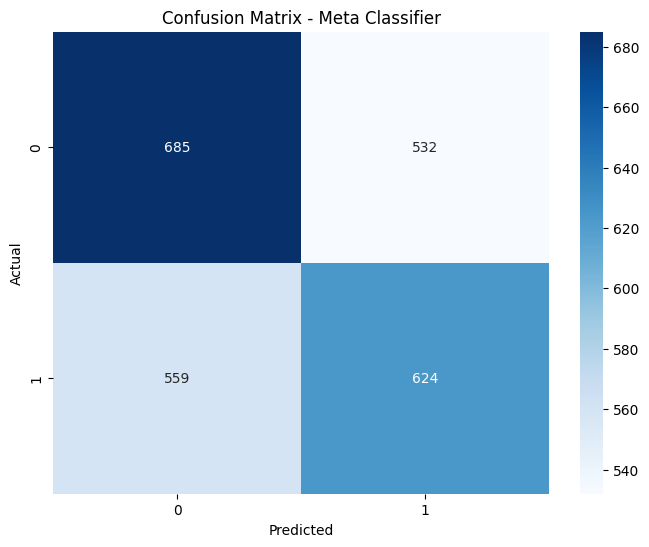

In [ ]:
cm_dt_classifier = confusion_matrix(target, y_pred_meta)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nb, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix - Meta Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# **ROC VS AUC**

# **Random Forest**

AUC Score: 0.8943


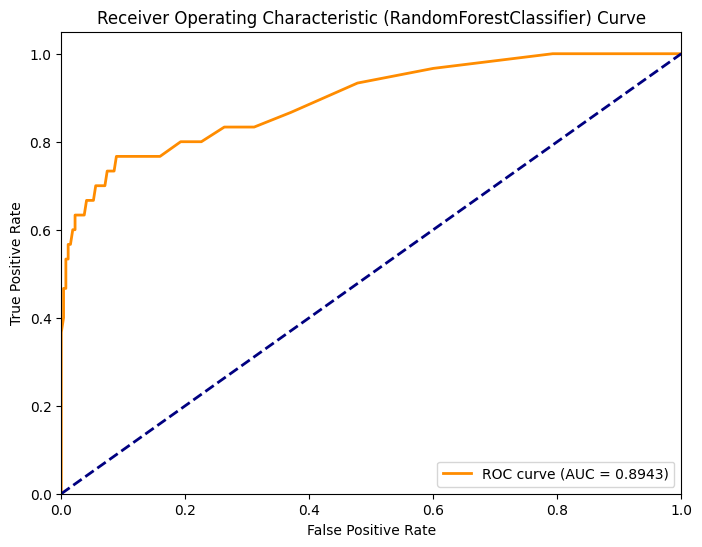

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier


# 1. Create a sample imbalanced dataset (use your dataset here)
X_final, Y_final = make_classification(n_samples=1000, n_classes=2, weights=[0.9, 0.1], random_state=42)

# 2. Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_final, Y_final, test_size=0.3, random_state=42)

# 3. Train a classifier (Random Forest in this example)
model = RandomForestClassifier()
model.fit(X_train, y_train)

# 4. Predict probabilities for the test set
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Get probability of class 1

# 5. Calculate the AUC score
auc = roc_auc_score(y_test, y_pred_proba)
print(f"AUC Score: {auc:.4f}")

# 6. Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# 7. Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (RandomForestClassifier) Curve')
plt.legend(loc="lower right")
plt.show()


# **nBayes**

AUC Score: 0.7247


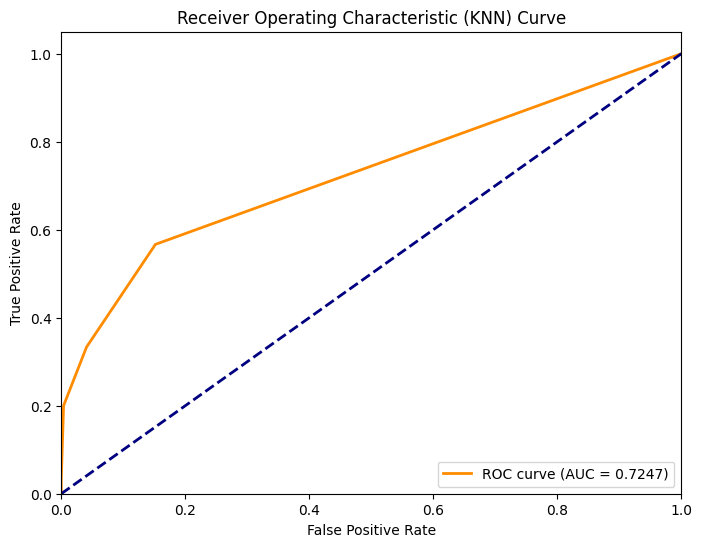

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.naive_bayes import GaussianNB

# 1. Create a sample imbalanced dataset (use your dataset here)
X_final, Y_final = make_classification(n_samples=1000, n_classes=2, weights=[0.9, 0.1], random_state=42)

# 2. Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_final, Y_final, test_size=0.3, random_state=42)

# 3. Train a classifier (Random Forest in this example)
model = KNeighborsClassifier() # Assign the existing GaussianNB instance to model.
model.fit(X_train, y_train)

# 4. Predict probabilities for the test set
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Get probability of class 1

# 5. Calculate the AUC score
auc = roc_auc_score(y_test, y_pred_proba)
print(f"AUC Score: {auc:.4f}")

# 6. Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# 7. Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (KNN) Curve')
plt.legend(loc="lower right")
plt.show()


# **KNN**

AUC Score: 0.8814


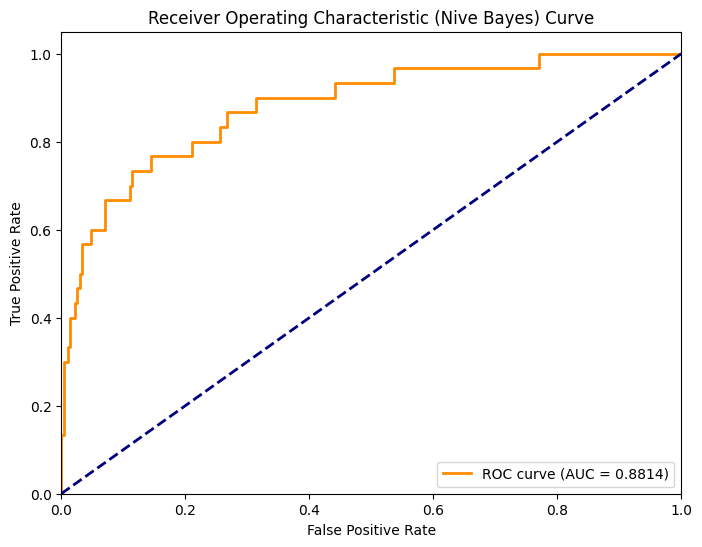

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.neighbors import KNeighborsClassifier

# 1. Create a sample imbalanced dataset (use your dataset here)
X_final, Y_final = make_classification(n_samples=1000, n_classes=2, weights=[0.9, 0.1], random_state=42)

# 2. Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_final, Y_final, test_size=0.3, random_state=42)

# 3. Train a classifier (Random Forest in this example)
model = nbayes # Assign the existing GaussianNB instance to model.
model.fit(X_train, y_train)

# 4. Predict probabilities for the test set
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Get probability of class 1

# 5. Calculate the AUC score
auc = roc_auc_score(y_test, y_pred_proba)
print(f"AUC Score: {auc:.4f}")

# 6. Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# 7. Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Nive Bayes) Curve')
plt.legend(loc="lower right")
plt.show()


# **XGB**

AUC Score: 0.8827


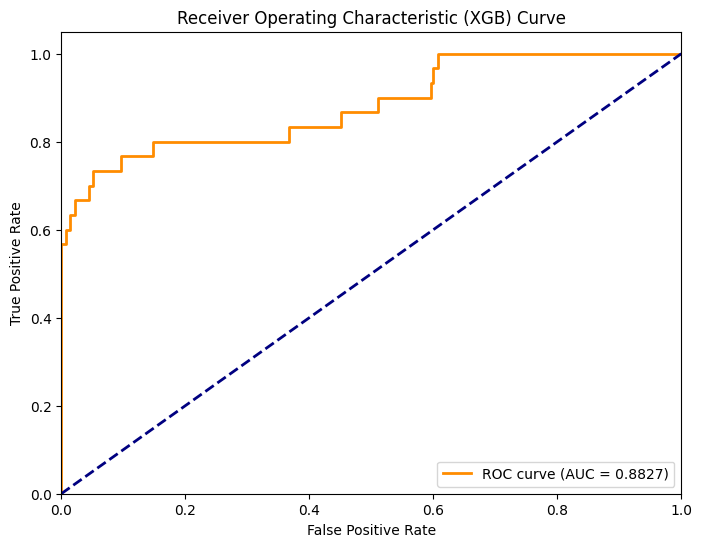

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
from xgboost import XGBClassifier

# 1. Create a sample imbalanced dataset (use your dataset here)
X_final, Y_final = make_classification(n_samples=1000, n_classes=2, weights=[0.9, 0.1], random_state=42)

# 2. Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_final, Y_final, test_size=0.3, random_state=42)

# 3. Train a classifier (Random Forest in this example)
model = XGBClassifier() # Assign the existing GaussianNB instance to model.
model.fit(X_train, y_train)

# 4. Predict probabilities for the test set
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Get probability of class 1

# 5. Calculate the AUC score
auc = roc_auc_score(y_test, y_pred_proba)
print(f"AUC Score: {auc:.4f}")

# 6. Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# 7. Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (XGB) Curve')
plt.legend(loc="lower right")
plt.show()


# **DT_Classifer**

AUC Score: 0.7870


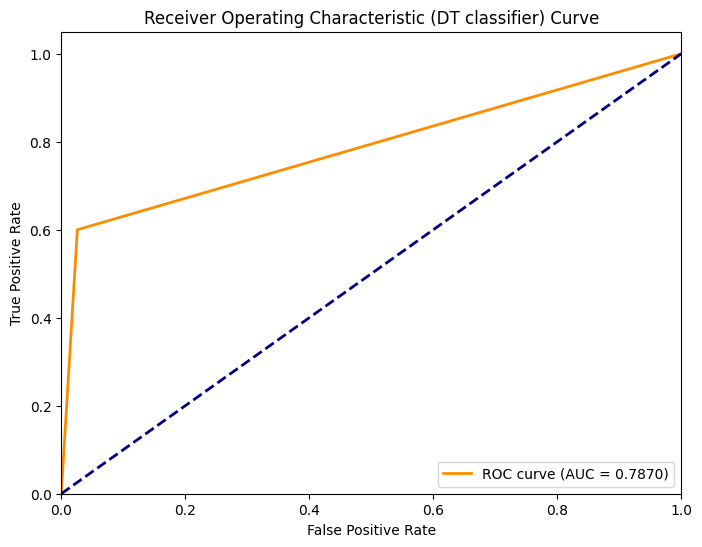

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import DecisionTreeClassifier

# 1. Create a sample imbalanced dataset (use your dataset here)
X_final, Y_final = make_classification(n_samples=1000, n_classes=2, weights=[0.9, 0.1], random_state=42)

# 2. Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_final, Y_final, test_size=0.3, random_state=42)

# 3. Train a classifier (Random Forest in this example)
model = DecisionTreeClassifier() # Assign the existing GaussianNB instance to model.
model.fit(X_train, y_train)

# 4. Predict probabilities for the test set
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Get probability of class 1

# 5. Calculate the AUC score
auc = roc_auc_score(y_test, y_pred_proba)
print(f"AUC Score: {auc:.4f}")

# 6. Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# 7. Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (DT classifier) Curve')
plt.legend(loc="lower right")
plt.show()


# **Logistic Regression**

AUC Score: 0.8728


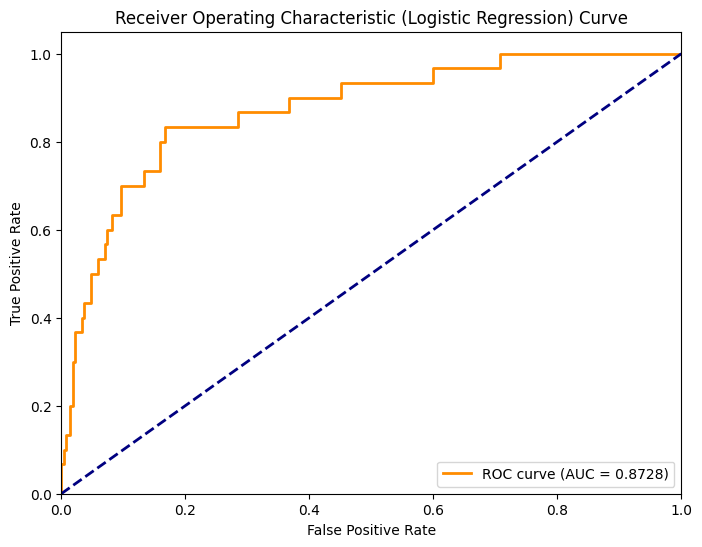

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression

# 1. Create a sample imbalanced dataset (use your dataset here)
X_final, Y_fianl= make_classification(n_samples=1000, n_classes=2, weights=[0.9, 0.1], random_state=42)

# 2. Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_final, Y_final, test_size=0.3, random_state=42)

# 3. Train a classifier (Random Forest in this example)
model = LogisticRegression() # Assign the existing GaussianNB instance to model.
model.fit(X_train, y_train)

# 4. Predict probabilities for the test set
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Get probability of class 1

# 5. Calculate the AUC score
auc = roc_auc_score(y_test, y_pred_proba)
print(f"AUC Score: {auc:.4f}")

# 6. Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# 7. Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Logistic Regression) Curve')
plt.legend(loc="lower right")
plt.show()


# **SVC**

AUC Score: 0.8731


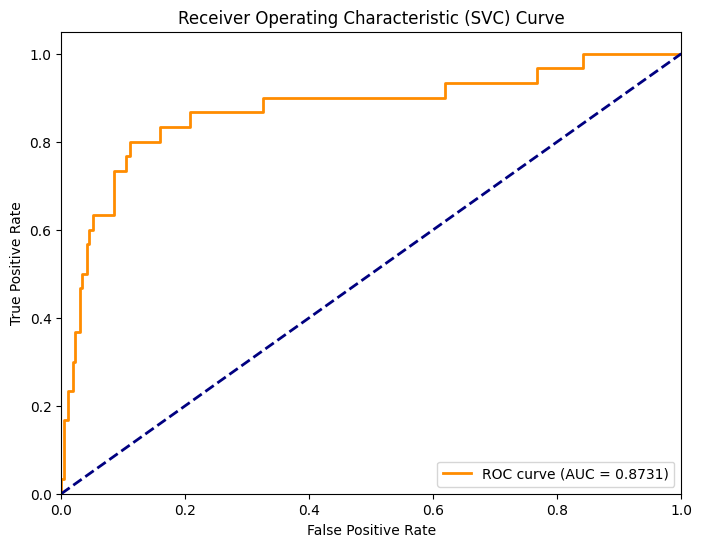

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve


# 1. Create a sample imbalanced dataset (use your dataset here)
X_final, Y_final = make_classification(n_samples=1000, n_classes=2, weights=[0.9, 0.1], random_state=42)

# 2. Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_final, Y_final, test_size=0.3, random_state=42)

# 3. Train a classifier (Random Forest in this example)
model = SVC(probability=True) # Assign the existing GaussianNB instance to model and enable probability estimation.
model.fit(X_train, y_train)

# 4. Predict probabilities for the test set
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Get probability of class 1

# 5. Calculate the AUC score
auc = roc_auc_score(y_test, y_pred_proba)
print(f"AUC Score: {auc:.4f}")

# 6. Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# 7. Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (SVC) Curve')
plt.legend(loc="lower right")
plt.show()

# **Meta Classifier**

AUC Score: 0.8235


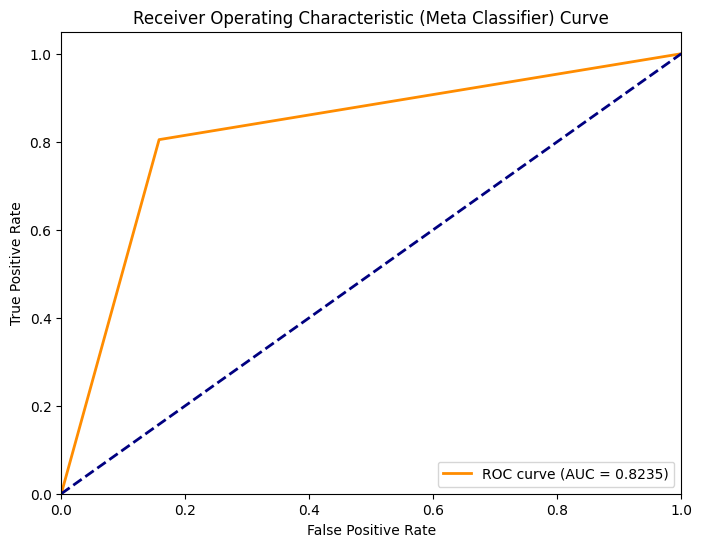

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve


# 1. Create a sample imbalanced dataset (use your dataset here)
X_final, Y_final = make_classification(n_samples=1000, n_classes=2, weights=[0.9, 0.1], random_state=42)

# 2. Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_final, Y_final, test_size=0.3, random_state=42)

# 3. Train a classifier (Random Forest in this example)
model = meta_classifier # Assign the existing GaussianNB instance to model and enable probability estimation.
model.fit(X_train, y_train)

# 4. Predict probabilities for the test set
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Get probability of class 1

# 5. Calculate the AUC score
auc = roc_auc_score(target, y_pred_meta)
print(f"AUC Score: {auc:.4f}")

# 6. Compute the ROC curve
fpr, tpr, thresholds = roc_curve(target, y_pred_meta)

# 7. Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Meta Classifier) Curve')
plt.legend(loc="lower right")
plt.show()